<a href="https://colab.research.google.com/github/am2644/TMDB-5000-Movie-Dataset/blob/main/TMDB_5000_Movie_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d tmdb/tmdb-movie-metadata

 56% 5.00M/8.89M [00:00<00:00, 45.3MB/s]
100% 8.89M/8.89M [00:00<00:00, 71.0MB/s]


In [ ]:
! unzip tmdb-movie-metadata.zip

Archive:  tmdb-movie-metadata.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


## TMDB 5000 Movie Dataset
The datasets we have contain information about 4083 movies, including budget, revenue, cast, and rating. I want to analyze them and, based on the information I have, create some models that could predict whether a movie could be successful or not. After that, I want to develop a simple recommendation system. Given the title of a movie, the recommendation system would suggest three similar movies from the list.

In [ ]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import json  # For working with JSON data
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import MinMaxScaler  # For scaling features
from sklearn.linear_model import LogisticRegression  # For Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree model
from sklearn.ensemble import RandomForestClassifier  # For Random Forest model
from xgboost import XGBClassifier  # For XGBoost model
from sklearn.metrics import confusion_matrix, classification_report  # For evaluating model performance
from sklearn.neighbors import KNeighborsClassifier as KNN  # For K-Nearest Neighbors model


## Data Preprocessing

In [ ]:
# Importing the pandas library for data manipulation
import pandas as pd

# Reading the first CSV file into a DataFrame (assuming the file contains movie credits data)
df1 = pd.read_csv('/content/tmdb_5000_credits.csv')

# Reading the second CSV file into a DataFrame (assuming the file contains movie details data)
df2 = pd.read_csv('/content/tmdb_5000_movies.csv')

# Printing the shapes of both DataFrames to check the number of rows and columns in each
# This helps in understanding the structure and size of the datasets
# df1.shape returns the number of rows and columns in df1
# df2.shape returns the number of rows and columns in df2
df1.shape, df2.shape


((4803, 4), (4803, 20))

In [ ]:
df1.head(3).T

,0,1,2
movie_id,19995,285,206647
title,Avatar,Pirates of the Caribbean: At World's End,Spectre
cast,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
crew,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [ ]:
df2.head(3).T

,0,1,2
budget,237000000,300000000,245000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/
id,19995,285,206647
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
original_language,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...
popularity,150.437577,139.082615,107.376788
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."


In [ ]:
# Renaming the column 'movie_id' to 'id' in DataFrame df1
# This is done to prepare for merging with DataFrame df2, which likely has a column named 'id'
# inplace=True ensures that the changes are made directly to the DataFrame without creating a copy
df1.rename(columns={'movie_id': 'id'}, inplace=True)

# Merging df1 and df2 DataFrames based on the common column 'id'
# This operation combines the two DataFrames into a single DataFrame based on matching values in the 'id' column
df = df1.merge(df2, on='id')

# Printing the first 3 rows of the merged DataFrame, transposed for better visibility
# The .head(3) method returns the first 3 rows of the DataFrame
# .T transposes the DataFrame, swapping rows and columns, for easier viewing of data
df.head(3).T


,0,1,2
id,19995,285,206647
title_x,Avatar,Pirates of the Caribbean: At World's End,Spectre
cast,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
crew,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
budget,237000000,300000000,245000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
original_language,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

In [ ]:
df['status'].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [ ]:
len(df[df['revenue'] == 0]), len(df[df['budget'] == 0])

(1427, 1037)

In [ ]:
# Calculating the median budget and revenue values from the DataFrame
b_median = df['budget'].median()
r_median = df['revenue'].median()

# Replacing budget values less than 1000 with the median budget value
# This is likely to correct erroneous or missing budget data
df.loc[df['budget'] < 1000, 'budget'] = b_median

# Replacing revenue values equal to 0 with the median revenue value
# This is likely to handle missing or erroneous revenue data
df['revenue'] = df['revenue'].replace(0, r_median)


In [ ]:
# Dropping columns 'homepage', 'title_y', 'status', 'original_title' from the DataFrame
# These columns might be considered irrelevant or redundant for the analysis
df.drop(columns=['homepage', 'title_y', 'status', 'original_title'], inplace=True)

In [ ]:
# Converting the 'release_date' column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extracting the year and month from the 'release_date' column and creating new columns 'year' and 'month'
# This enables easier analysis based on the release date of the movies
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

In [ ]:
# Dropping the 'release_date' column from the DataFrame
# This column was likely used to extract year and month information, which are now stored in separate columns
df.drop(columns=['release_date'], inplace=True)


In [ ]:
# Filling missing values in the 'tagline' column with empty strings
# This replaces NaN values with an empty string, likely to handle missing tagline data
df['tagline'] = df['tagline'].fillna('')

# Filling missing values in the 'runtime' column with the median runtime value
# This is likely done to handle missing or erroneous runtime data
df['runtime'] = df['runtime'].fillna(df['runtime'].median())


In [ ]:
df[df['overview'].isna()]

,id,title_x,cast,crew,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,year,month
2656,370980,Chiamatemi Francesco - Il Papa della gente,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de...",15000000,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",19170001,103.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",,7.3,12,2015.0,12.0
4140,459488,"To Be Frank, Sinatra at 100","[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de...",15000000,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",19170001,103.0,[],,0.0,0,2015.0,12.0
4431,292539,Food Chains,[],"[{""credit_id"": ""5470c3b1c3a368085e000abd"", ""de...",913000,"[{""id"": 99, ""name"": ""Documentary""}]",[],de,NaN,0.795698,[],[],19170001,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",,7.4,8,2014.0,4.0


In [ ]:
# Updating specific entries in the 'overview' column with corrected or expanded descriptions
# These changes likely provide more accurate or detailed information about the respective movies
df.loc[2656, 'overview'] = 'A biopic of the rise of father Jorge Mario Bergoglio SJ from a teacher in a Jesuit High School in Argentina to archbishop and cardinal of Buenos Aires to Pope of the Roman Catholic Church. The story touches on his relation with his fellow Jesuits in Argentina and Europe, to his relation with laureate writer Jorge Luis Borges, Argentine dictator Jorge Rafael Videla, and archbishops Laghi (nuncio to Argentina) and Quarracino (cardinal of Buenos Aires), up to the moment where he is elected Pope in 2013.'
df.loc[4140, 'overview'] = 'The life of Frank Sinatra, as an actor and singer and the steps along the way that led him to become such an icon.'
df.loc[4431, 'overview'] = "There is so much interest in food these days yet there is almost no interest in the hands that pick that food. In the US, farm labor has always been one of the most difficult and poorly paid jobs and has relied on some of the nation's most vulnerable people. While the legal restrictions which kept people bound to farms, like slavery, have been abolished, exploitation still exists, ranging from wage theft to modern-day slavery. These days, this exploitation is perpetuated by the corporations at the top of the food chain: supermarkets. Their buying power has kept wages pitifully low and has created a scenario where desperately poor people are willing to put up with anything to keep their jobs."

In [ ]:
df[df['year'].isna()]

,id,title_x,cast,crew,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,year,month
4553,380097,America Is Still the Place,[],[],15000000,[],[],en,1971 post civil rights San Francisco seemed li...,0.0,[],[],19170001,0.0,[],,0.0,0,NaN,NaN


In [ ]:
df.loc[4553, 'year'] = 2022
df.loc[4553, 'month'] = 10

We have three records that lack an overview and one record without a release date. I found the overviews for them from IMDb, and I also obtained a release date for that record, so I filled in the missing information.
We also have many records with zero revenue and budget, as well as some NaN values in the 'runtime' column. I replaced them with the median of each column, and I dropped 'homepage', 'title_y', 'status', and 'original_title' because we have similar columns in our dataset or they don't contain useful information.

In [ ]:
# Function to extract names from a string representation of a list of dictionaries
def extract_names(string):
    if string == '[]':
        return ''
    else:
        dict_list = json.loads(string)
        names = []
        for item in dict_list:
            name = item.get('name', '')
            names.append(name)
        return ', '.join(names)

# Function to extract the first ID from a string representation of a list of dictionaries
def extract_id(string):
    if string == '[]':
        return 0
    else:
        dict_list = json.loads(string)
        ids = []
        for item in dict_list:
            id = item.get('id', 0)
            ids.append(id)
        return ids[0]


In [ ]:
# Applying the extract_names function to the 'genres' column and storing the result in a new column 'ngneres'
df['ngneres'] = df['genres'].apply(extract_names)

# Applying the extract_names function to the 'keywords' column and storing the result in a new column 'nkeywords'
df['nkeywords'] = df['keywords'].apply(extract_names)

# Applying the extract_names function to the 'production_companies' column and storing the result in a new column 'nproduction_companies'
df['nproduction_companies'] = df['production_companies'].apply(extract_names)

# Applying the extract_names function to the 'production_countries' column and storing the result in a new column 'nproduction_countries'
df['nproduction_countries'] = df['production_countries'].apply(extract_names)

# Applying the extract_names function to the 'cast' column and storing the result in a new column 'ncast'
df['ncast'] = df['cast'].apply(extract_names)


In [ ]:
# Applying the extract_id function to the 'genres' column and storing the result in a new column 'igneres'
df['igneres'] = df['genres'].apply(extract_id)

# Applying the extract_id function to the 'keywords' column and storing the result in a new column 'ikeywords'
df['ikeywords'] = df['keywords'].apply(extract_id)

# Applying the extract_id function to the 'production_companies' column and storing the result in a new column 'iproduction_companies'
df['iproduction_companies'] = df['production_companies'].apply(extract_id)

# Applying the extract_id function to the 'production_countries' column and storing the result in a new column 'iproduction_countries'
df['iproduction_countries'] = df['production_countries'].apply(extract_id)

# Applying the extract_id function to the 'cast' column and storing the result in a new column 'icast'
df['icast'] = df['cast'].apply(extract_id)


I extracted names and main IDs from the 'genres', 'keywords', 'production_companies', 'production_countries', and 'cast' columns, storing them in separate columns. I plan to use this information for my prediction models and recommendation system.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4803 non-null   int64  
 1   title_x                4803 non-null   object 
 2   cast                   4803 non-null   object 
 3   crew                   4803 non-null   object 
 4   budget                 4803 non-null   int64  
 5   genres                 4803 non-null   object 
 6   keywords               4803 non-null   object 
 7   original_language      4803 non-null   object 
 8   overview               4803 non-null   object 
 9   popularity             4803 non-null   float64
 10  production_companies   4803 non-null   object 
 11  production_countries   4803 non-null   object 
 12  revenue                4803 non-null   int64  
 13  runtime                4803 non-null   float64
 14  spoken_languages       4803 non-null   object 
 15  tagl

In [ ]:
# Calculating the success rate by dividing 'revenue' by 'budget' and storing the result in a new column 'success_rate'
# This metric indicates the ratio of revenue generated to the budget spent, providing insight into the financial success of movies
df['success_rate'] = df['revenue'] / df['budget']

I defined a success rate as the ratio of revenue to budget.

In [ ]:
# Creating a new DataFrame 'df_an' containing selected columns for analysis
# These columns likely represent features or variables of interest for further analysis
df_an = df[['budget', 'runtime', 'year', 'month', 'igneres', 'ikeywords',
            'iproduction_companies', 'iproduction_countries',
            'icast', 'success_rate']]

# Filtering the 'df_an' DataFrame to include only rows where 'success_rate' is less than or equal to 25
# This likely removes outliers or extreme values from the dataset for more focused analysis
df_an = df_an[df_an['success_rate'] <= 25]

I use only these columns for my analysis and model training: 'budget', 'runtime', 'year', 'month', 'genres', 'keywords', 'production_companies', 'production_countries', 'cast', and 'success_rate'. I do not use columns such as revenue, vote rate, etc., because these are highly related to the success of a movie, and I want information that can be collected before releasing the movies, not after we know about their success.

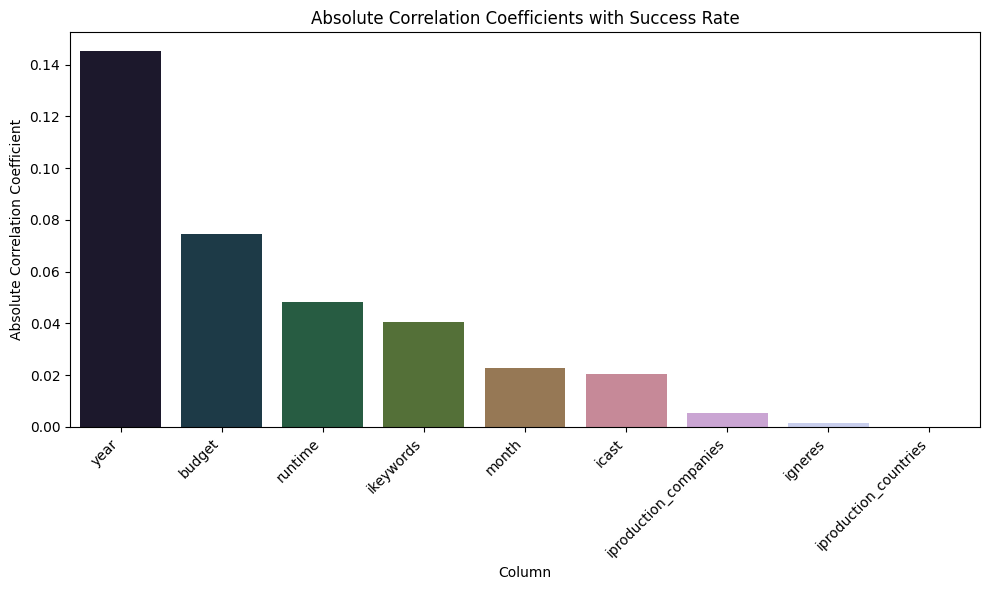

In [ ]:
# Calculating the correlation matrix for the 'df_an' DataFrame
correlation_matrix = df_an.corr()

# Extracting the row corresponding to 'success_rate' and dropping the 'success_rate' column
success_correlation = correlation_matrix.loc['success_rate'].drop('success_rate')

# Getting the absolute values of the correlation coefficients
success_correlation_abs = success_correlation.abs()

# Sorting the absolute correlation coefficients in descending order
success_correlation_sorted = success_correlation_abs.sort_values(ascending=False)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=success_correlation_sorted.index,
            y=success_correlation_sorted.values,
            hue=success_correlation_sorted.index, palette='cubehelix',
            legend=False)
plt.xlabel('Column')
plt.ylabel('Absolute Correlation Coefficient')
plt.title('Absolute Correlation Coefficients with Success Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


As we can see, year, budget, and runtime have the most correlation with the success of movies, but there are no strong correlations.

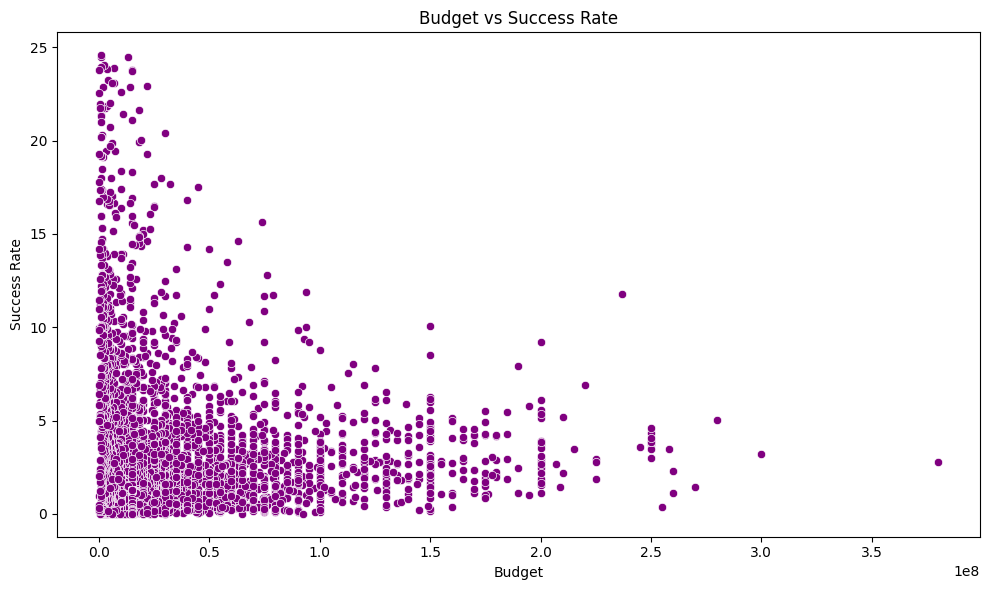

In [ ]:
# Creating a scatter plot to visualize the relationship between 'budget' and 'success_rate'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_an, x='budget', y='success_rate', color='purple')
plt.xlabel('Budget')
plt.ylabel('Success Rate')
plt.title('Budget vs Success Rate')
plt.tight_layout()
plt.show()


In this picture, we can see a scatter plot that shows the success rate of movies per budget. We observe that most movies with higher success rates are low-budget movies.

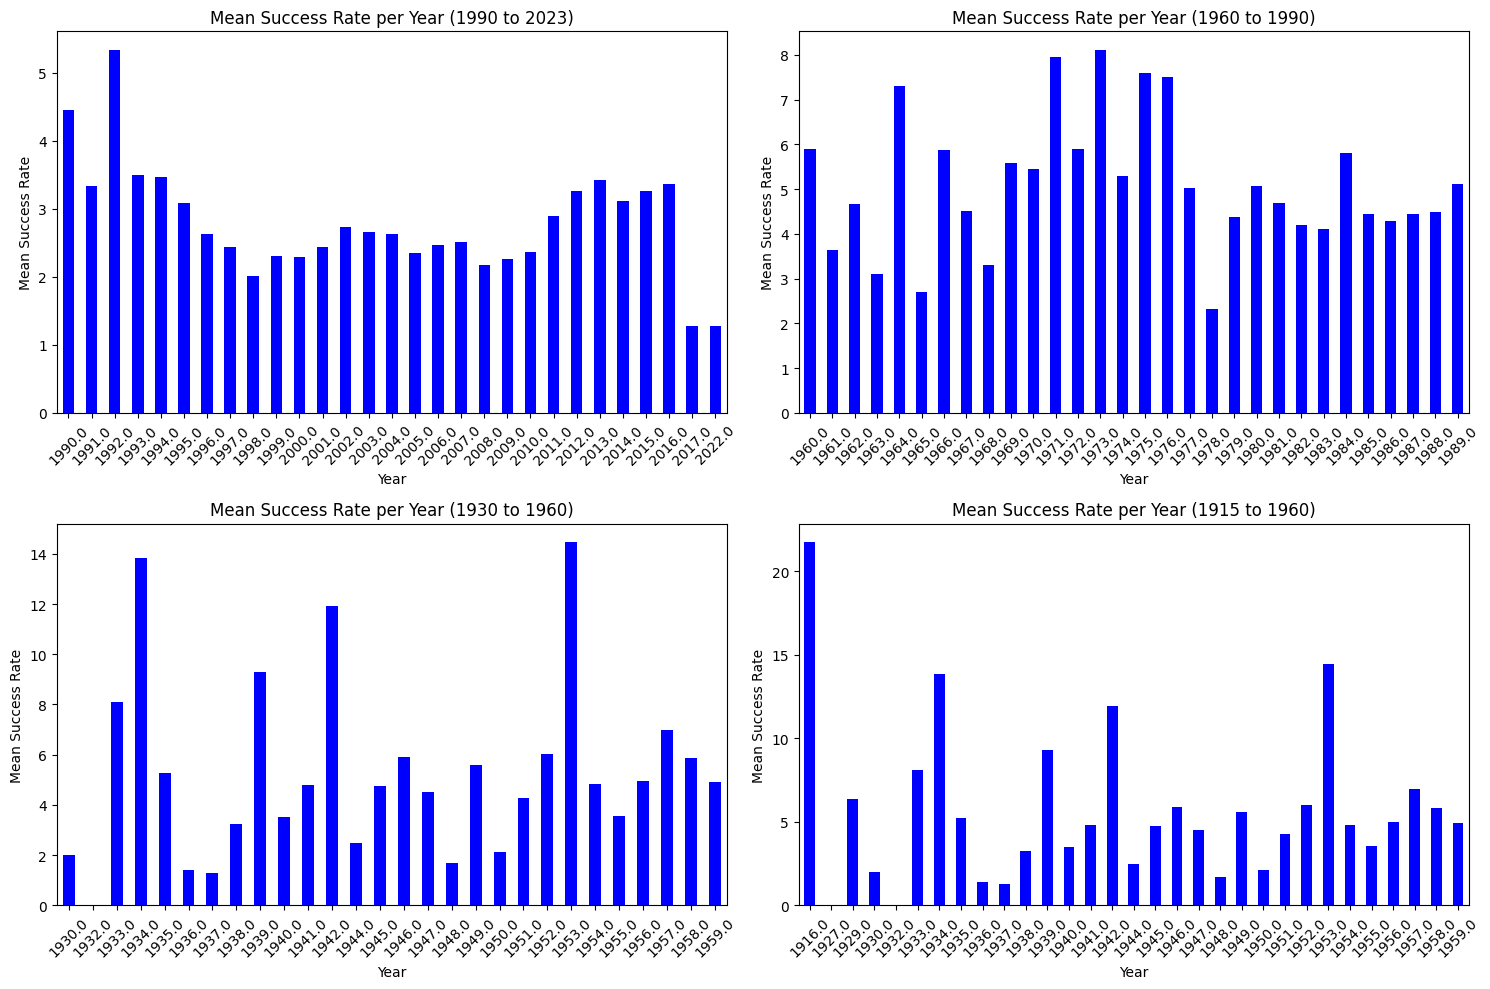

In [ ]:
# Define the year ranges
year_ranges = [(1990, 2023), (1960, 1990), (1930, 1960), (1915, 1930)]

# Initialize empty DataFrames to store subsets
dfs = []

# Iterate over each year range
for start_year, end_year in year_ranges:
    # Filter DataFrame for movies within the current year range
    subset_df = df_an[(df_an['year'] >= start_year) & (df_an['year'] < end_year)]
    dfs.append(subset_df)

# Calculate mean success rate per year for each subset
mean_success_rates = [subset_df.groupby('year')['success_rate'].mean() for subset_df in dfs]

# Plot mean success rate per year for each subset
plt.figure(figsize=(15, 10))

for i, mean_success_rate in enumerate(mean_success_rates):
    plt.subplot(2, 2, i+1)
    mean_success_rate.plot(kind='bar', color='b')
    plt.xlabel('Year')
    plt.ylabel('Mean Success Rate')
    plt.title(f'Mean Success Rate per Year ({year_ranges[i][0]} to {year_ranges[i][1]})')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()



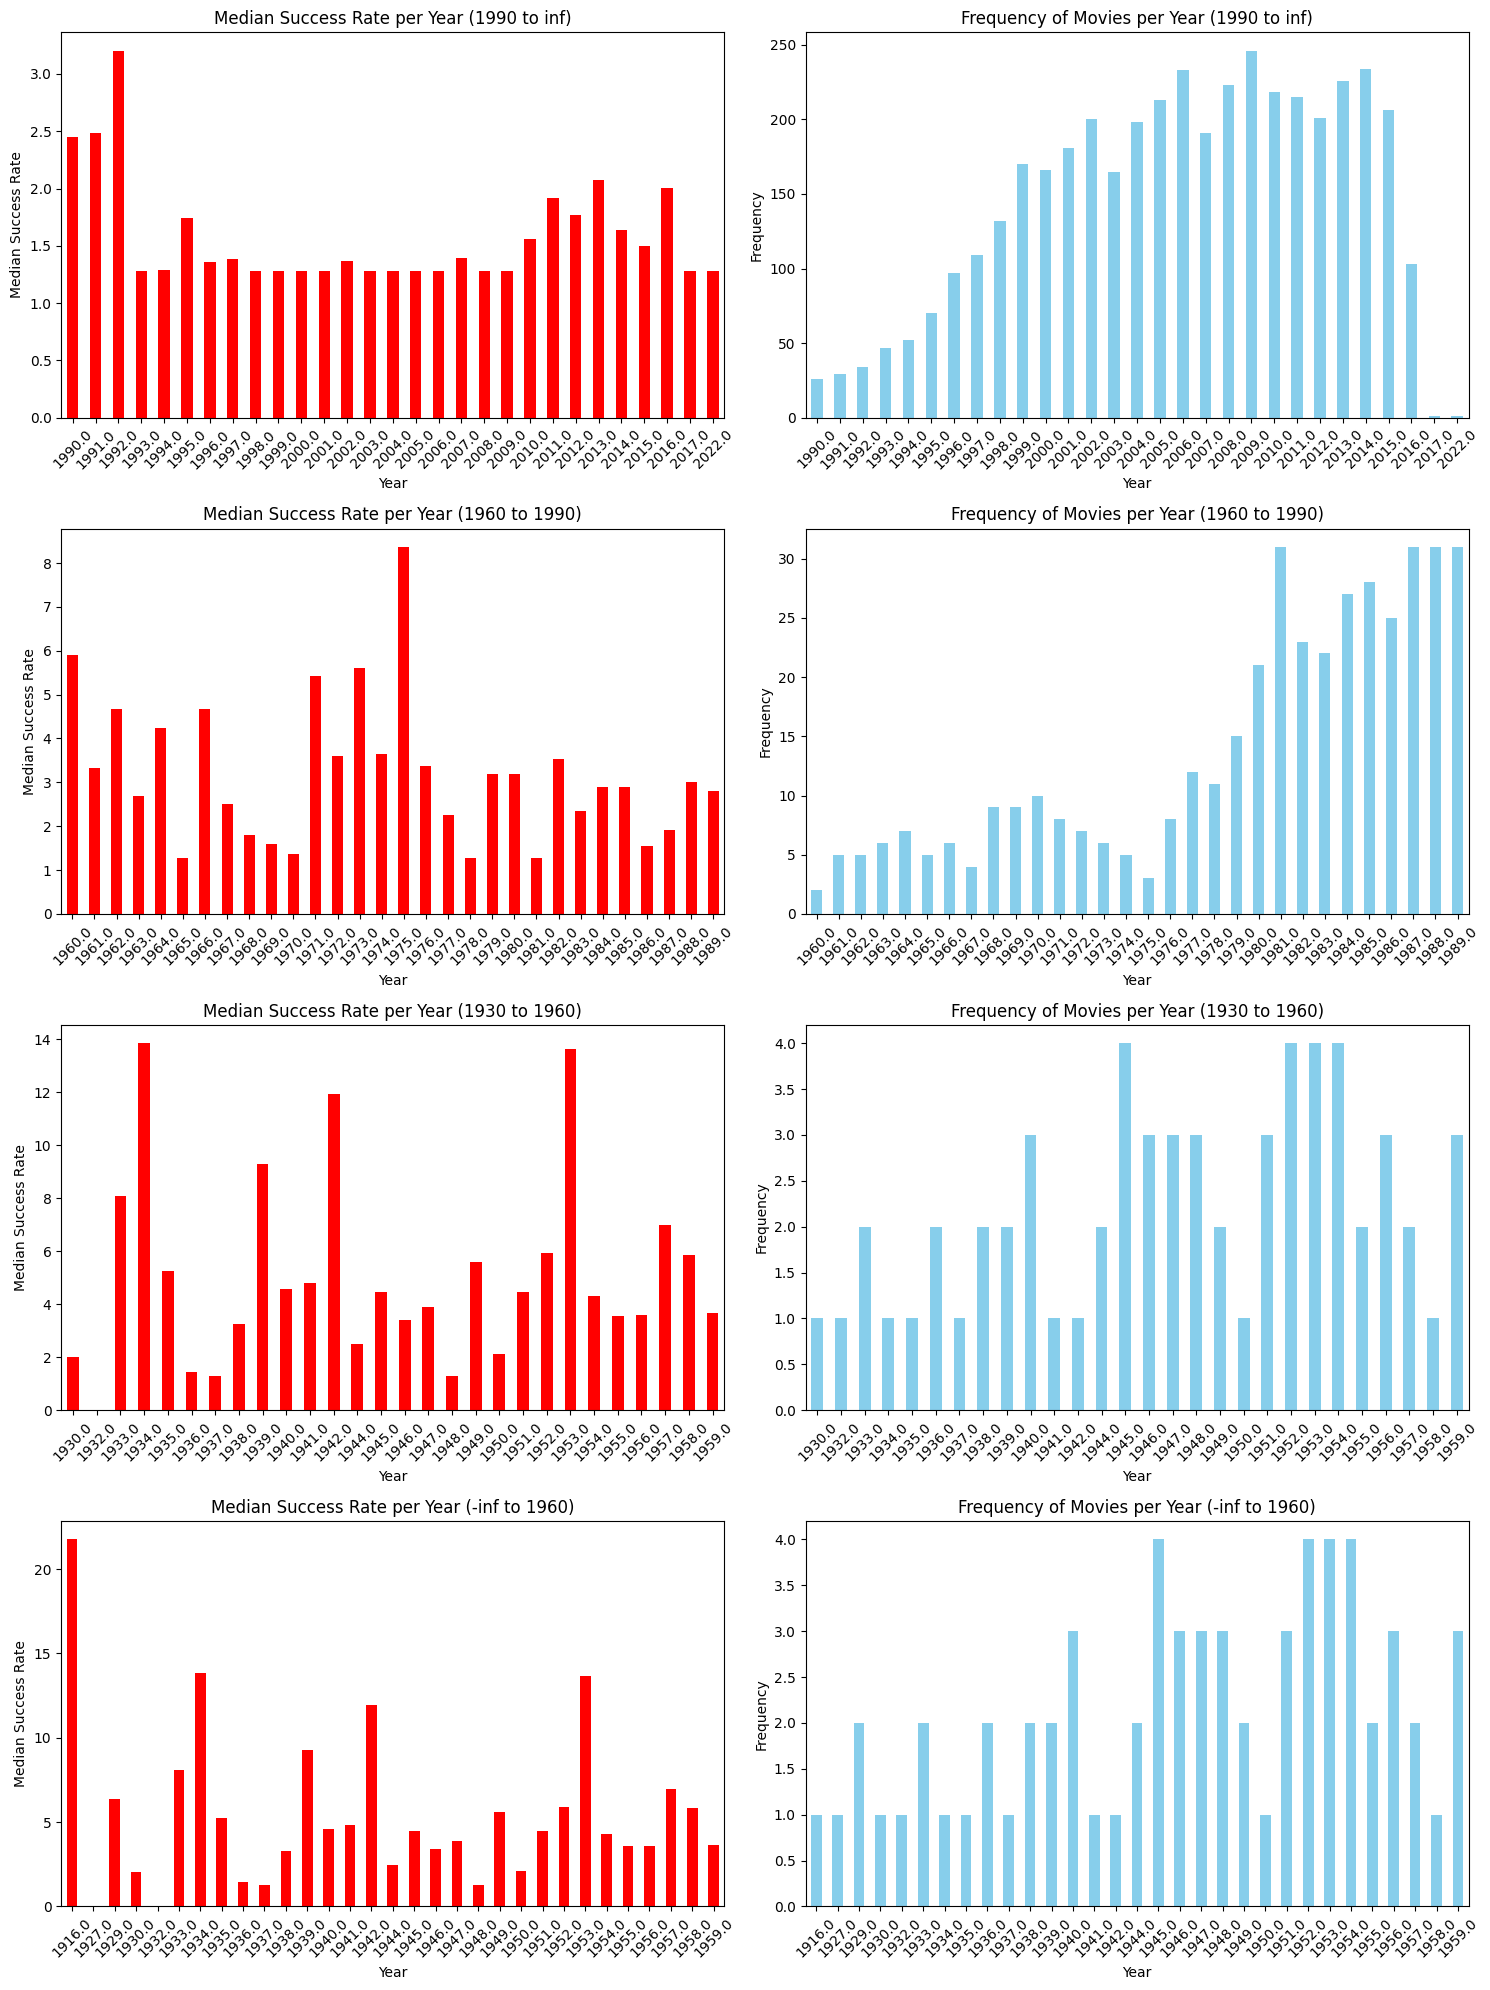

In [ ]:
# Define the year ranges
year_ranges = [(1990, float('inf')), (1960, 1990), (1930, 1960), (float('-inf'), 1960)]

# Initialize empty DataFrames to store subsets
dfs = []

# Iterate over each year range
for start_year, end_year in year_ranges:
    # Filter DataFrame for movies within the current year range
    subset_df = df_an[(df_an['year'] >= start_year) & (df_an['year'] < end_year)]
    dfs.append(subset_df)

# Calculate median success rate per year and frequency for each subset
results = []

for subset_df in dfs:
    median_success_rate = subset_df.groupby('year')['success_rate'].median()
    frequency = subset_df['year'].value_counts().sort_index()
    results.append((median_success_rate, frequency))

# Plot median success rate and frequency per year for each subset
plt.figure(figsize=(15, 20))

for i, (median_success_rate, frequency) in enumerate(results):
    plt.subplot(4, 2, 2*i+1)
    median_success_rate.plot(kind='bar', color='red')
    plt.xlabel('Year')
    plt.ylabel('Median Success Rate')
    plt.title(f'Median Success Rate per Year ({year_ranges[i][0]} to {year_ranges[i][1]})')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.subplot(4, 2, 2*i+2)
    frequency.plot(kind='bar', color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Movies per Year ({year_ranges[i][0]} to {year_ranges[i][1]})')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

As we can see in the plots above, we have more successful movies from 1916 to 1960. However, we should consider that we have fewer movies in this period compared to 1960 to 2022. In the latter period, we have more movies, but the success rate of them decreases.

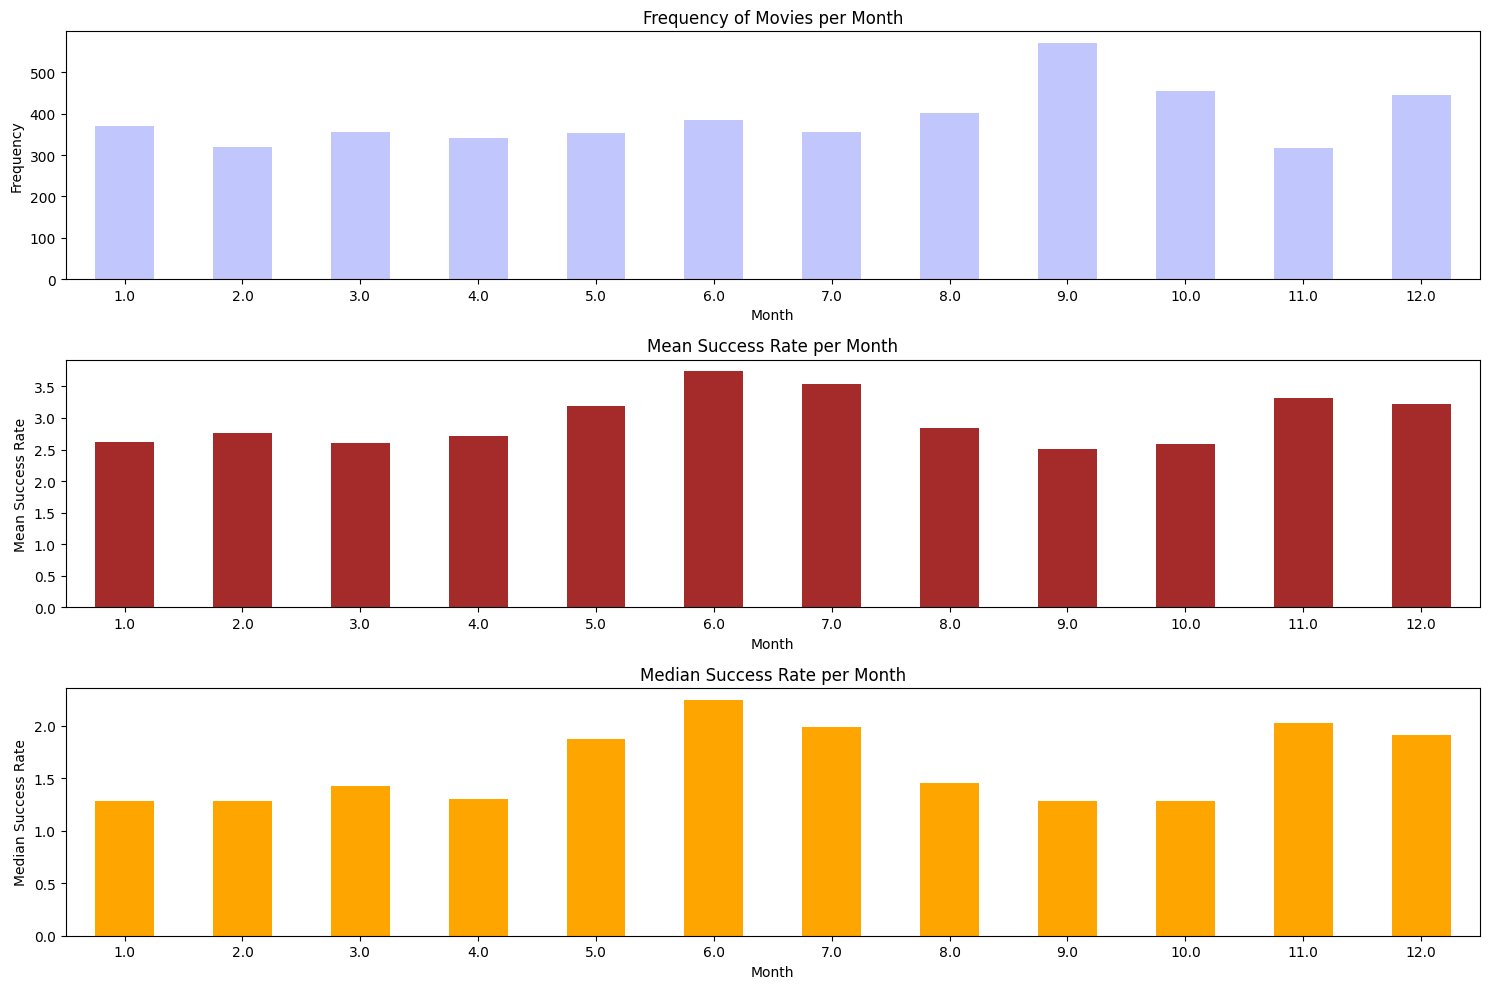

In [ ]:
# Calculate frequency, mean, and median success rate per month
month_stats = df_an.groupby('month')['success_rate'].agg(['count', 'mean', 'median'])

# Plot frequency, mean, and median success rate per month
plt.figure(figsize=(15, 10))

# Plot frequency
plt.subplot(3, 1, 1)
month_stats['count'].plot(kind='bar', color=sns.xkcd_rgb['light periwinkle'])
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Movies per Month')
plt.xticks(rotation=0)
plt.tight_layout()

# Plot mean success rate
plt.subplot(3, 1, 2)
month_stats['mean'].plot(kind='bar', color='brown')
plt.xlabel('Month')
plt.ylabel('Mean Success Rate')
plt.title('Mean Success Rate per Month')
plt.xticks(rotation=0)
plt.tight_layout()

# Plot median success rate
plt.subplot(3, 1, 3)
month_stats['median'].plot(kind='bar', color='orange')
plt.xlabel('Month')
plt.ylabel('Median Success Rate')
plt.title('Median Success Rate per Month')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

I plotted the median success rate and movie frequency per month. As we can see, most movies are released in September, October, and December. However, the most successful movies are released in June, July, November, and December, indicating that people tend to visit movie theaters more in the middle and end of the year.


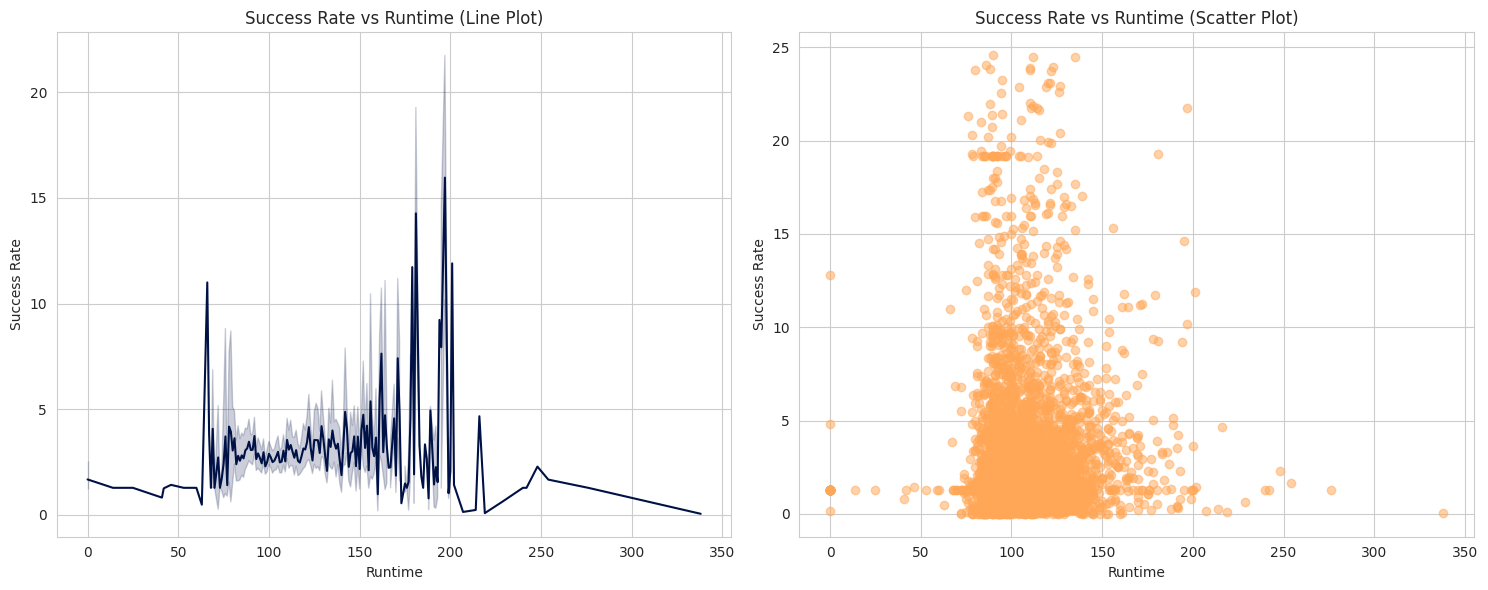

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot line chart of success rate vs runtime
sns.lineplot(data=df_an, x='runtime', y='success_rate', color=sns.xkcd_rgb['navy blue'] , ax=ax[0])
ax[0].set_xlabel('Runtime')
ax[0].set_ylabel('Success Rate')
ax[0].set_title('Success Rate vs Runtime (Line Plot)')

# Plot scatter plot of success rate vs runtime
ax[1].scatter(df_an['runtime'], df_an['success_rate'], color=sns.xkcd_rgb['pale orange'] , alpha=0.5)
ax[1].set_xlabel('Runtime')
ax[1].set_ylabel('Success Rate')
ax[1].set_title('Success Rate vs Runtime (Scatter Plot)')
ax[1].grid(True)

plt.tight_layout()
plt.show()


In the plot above, we have success rate vs. runtime. As we can see, there is a common runtime range for movies between 75 days and 200 days. Additionally, we observe that movies with lower success rates typically have runtimes of more than 200 days.

According to the datasets we have, we cannot present a valuable analysis about successful movies because we only have data for 4803 movies, which is not sufficient to comment on the movie industry as a whole. However, we observe that there are many successful low-budget movies, particularly from the 1960s. We can conclude that during this period, people had a greater interest in going to the cinema. Our most successful movies are from 1916 to 1930; however, the number of movies we have from this period is low. This suggests that in the early days of the cinema industry, it was a novel experience for people, and they frequented cinemas more often. In contrast, in modern times, streaming services and illegal releases of movies could have a more significant impact on the industry.

In [ ]:
# Creating a binary label 'success' based on 'success_rate' using a lambda function
df_an['success'] = df_an['success_rate'].apply(lambda x: 1 if x > 2 else 0)

# Separating features (X) and target variable (y)
X = df_an.drop(columns=['success', 'success_rate'])
y = df_an['success']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

# Printing the shapes of the training and testing sets
# This helps in verifying that the data has been split correctly
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3499, 9), (3499,), (1167, 9), (1167,))

I considered movies with a success rate of 2 or higher as successful.

In [ ]:
# Initializing and fitting machine learning models
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, min_samples_leaf=2)
random_forest_model = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=20, min_samples_split=10, min_samples_leaf=5)
xgboost_model = XGBClassifier()
KNN_model = KNN(n_neighbors=7)

# Fitting each model to the training data
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

I used these five models for my classification: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, XGBoost Classifier, and K-Neighbors Classifier.

In [ ]:
# Making predictions using each trained model on the testing data
logistic_pred = logistic_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
xgboost_pred = xgboost_model.predict(X_test)
KNN_pred = KNN_model.predict(X_test)


The classification report shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem. Visual classification reports are used to compare classification models to select models that are “redder”, e.g. have stronger classification metrics or that are more balanced.

The metrics are defined in terms of true and false positives, and true and false negatives. Positive and negative in this case are generic names for the classes of a binary classification problem. In the example above, we would consider true and false occupied and true and false unoccupied. Therefore a true positive is when the actual class is positive as is the estimated class. A false positive is when the actual class is negative but the estimated class is positive. Using this terminology the metrics are defined as follows:

#precision
Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

#recall
Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

#f1 score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

#support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [ ]:
# Generating a classification report for the logistic regression model
# Setting zero_division=0 to handle the case where there are no true positives or true negatives
logistic_report = classification_report(y_test, logistic_pred, zero_division=0)

# Printing the classification report
print(logistic_report)


              precision    recall  f1-score   support

           0       0.62      0.79      0.70       670
           1       0.56      0.35      0.43       497

    accuracy                           0.61      1167
   macro avg       0.59      0.57      0.57      1167
weighted avg       0.60      0.61      0.59      1167



In [ ]:
# Generating a classification report for the decision tree classifier model
decision_tree_report = classification_report(y_test, decision_tree_pred)

# Printing the classification report
print(decision_tree_report)

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       670
           1       0.62      0.54      0.58       497

    accuracy                           0.66      1167
   macro avg       0.66      0.65      0.65      1167
weighted avg       0.66      0.66      0.66      1167



In [ ]:
# Generating a classification report for the random forest classifier model
random_forest_report = classification_report(y_test, random_forest_pred)

# Printing the classification report
print(random_forest_report)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       670
           1       0.70      0.61      0.65       497

    accuracy                           0.72      1167
   macro avg       0.72      0.71      0.71      1167
weighted avg       0.72      0.72      0.72      1167



In [ ]:
# Generating a classification report for the XGBoost classifier model
xgboost_report = classification_report(y_test, xgboost_pred)

# Printing the classification report
print(xgboost_report)

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       670
           1       0.69      0.63      0.66       497

    accuracy                           0.72      1167
   macro avg       0.72      0.71      0.71      1167
weighted avg       0.72      0.72      0.72      1167



In [ ]:
# Generating a classification report for the KNN classifier model
KNN_report = classification_report(y_test, KNN_pred)

# Printing the classification report
print(KNN_report)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       670
           1       0.59      0.55      0.57       497

    accuracy                           0.65      1167
   macro avg       0.64      0.63      0.64      1167
weighted avg       0.64      0.65      0.65      1167



Random Forest and XGBoost classifiers perform relatively better than others, with higher overall accuracy and balanced precision-recall scores for both classes.
Logistic Regression and K-Neighbors Classifier have lower accuracy compared to the others.
Decision Tree Classifier also shows decent performance, falling between Random Forest and Logistic Regression models.
For further analysis, it's essential to consider the specific requirements and goals of the classification task, such as whether false positives or false negatives are more critical and the trade-offs between precision and recall.


#Understanding ROC-AUC:

Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) are essential evaluation metrics for binary classification models. The ROC curve is a graphical representation of the true positive rate (TPR) against the false positive rate (FPR) for various threshold values, which are used to classify instances into different classes.

#Interpreting ROC Curve:

The ROC curve illustrates the trade-off between sensitivity (recall) and specificity (1 - FPR) of a classifier across different threshold values.
A perfect classifier would have an ROC curve that passes through the top-left corner, indicating high sensitivity (TPR) and low FPR across all threshold values.
The diagonal line (random classifier) represents the scenario where the classifier's performance is no better than random guessing.

#Area Under the Curve (AUC):

AUC quantifies the overall performance of a classifier across all possible threshold values. It represents the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance.
AUC ranges from 0 to 1, where a higher value indicates better performance. AUC of 0.5 suggests that the classifier performs no better than random guessing, while an AUC of 1 represents a perfect classifier.
AUC provides a single scalar value to compare different classifiers or evaluate the performance of a single classifier.

#Practical Application:

ROC-AUC is particularly useful when the class distribution is imbalanced or when different misclassification costs exist for false positives and false negatives.
It helps in selecting the optimal threshold for classification, balancing sensitivity and specificity according to the problem's requirements.
ROC-AUC is widely used in various domains, including healthcare (diagnosis), finance (credit scoring), and marketing (customer churn prediction).


In summary, ROC-AUC is a valuable metric for evaluating the performance of binary classification models. It provides insights into the model's ability to discriminate between positive and negative instances across different threshold values, making it a crucial tool for model selection and performance assessment.

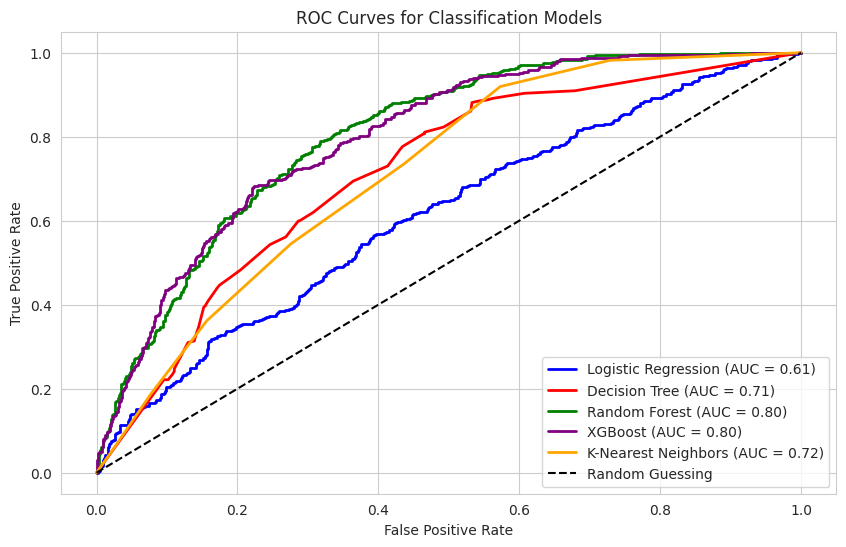

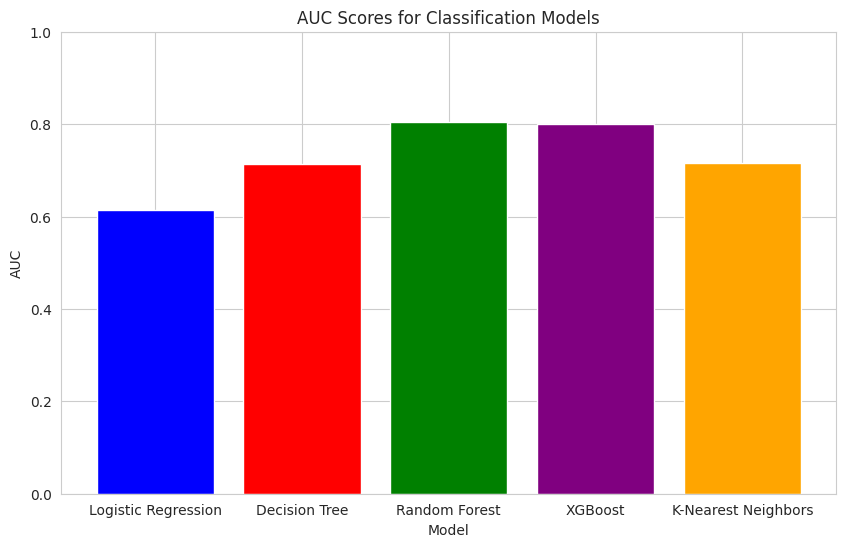

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for Logistic Regression
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
logistic_auc = auc(logistic_fpr, logistic_tpr)

# Compute ROC curve and ROC area for Decision Tree
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])
decision_tree_auc = auc(decision_tree_fpr, decision_tree_tpr)

# Compute ROC curve and ROC area for Random Forest
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])
random_forest_auc = auc(random_forest_fpr, random_forest_tpr)

# Compute ROC curve and ROC area for XGBoost
xgboost_fpr, xgboost_tpr, _ = roc_curve(y_test, xgboost_model.predict_proba(X_test)[:, 1])
xgboost_auc = auc(xgboost_fpr, xgboost_tpr)

# Compute ROC curve and ROC area for K-Nearest Neighbors
knn_fpr, knn_tpr, _ = roc_curve(y_test, KNN_model.predict_proba(X_test)[:, 1])
knn_auc = auc(knn_fpr, knn_tpr)

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
plt.plot(logistic_fpr, logistic_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(decision_tree_fpr, decision_tree_tpr, color='red', lw=2, label=f'Decision Tree (AUC = {decision_tree_auc:.2f})')
plt.plot(random_forest_fpr, random_forest_tpr, color='green', lw=2, label=f'Random Forest (AUC = {random_forest_auc:.2f})')
plt.plot(xgboost_fpr, xgboost_tpr, color='purple', lw=2, label=f'XGBoost (AUC = {xgboost_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='orange', lw=2, label=f'K-Nearest Neighbors (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend()
plt.show()

# Plot AUC values
plt.figure(figsize=(10, 6))
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'K-Nearest Neighbors']
auc_values = [logistic_auc, decision_tree_auc, random_forest_auc, xgboost_auc, knn_auc]
colors = ['blue', 'red', 'green', 'purple', 'orange']

plt.bar(models, auc_values, color=colors)
plt.xlabel('Model')
plt.ylabel('AUC')
plt.title('AUC Scores for Classification Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for AUC values
plt.show()


As we can see, based on the AUC, Random Forest and XGBoost are better models for this task.

## Recommendation System

First of all, I combined all of my text columns. Then, I used Spacy to clean my texts and trained a model with FastText. With that, I vectorized my combined text column and created a simple recommendation system. In this system, the user enters the name of a movie that is in the dataset, and based on its overview, the system recommends the three most similar movies in the dataset.

In [ ]:
import spacy
import fasttext
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Combining multiple columns into a single column named 'combined_column'
# This is useful for text-based analysis or natural language processing tasks
df['combined_column'] = df.apply(lambda row: ' '.join([str(row['title_x']), str(row['overview']), str(row['ngneres']), str(row['nkeywords']), str(row['ncast'])]), axis=1)

# Displaying the first 3 entries of the 'combined_column' for inspection
df['combined_column'].head(3)



0    Avatar In the 22nd century, a paraplegic Marin...
1    Pirates of the Caribbean: At World's End Capta...
2    Spectre A cryptic message from Bond’s past sen...
Name: combined_column, dtype: object

In [ ]:
# Load the English model
nlp = spacy.load("en_core_web_sm")

# Function to clean text using spaCy
def clean_text(text):
    # Parse the text using spaCy
    doc = nlp(text)

    # Lemmatize the tokens and remove stop words and punctuation
    cleaned_text = " ".join(token.lemma_ for token in doc if not token.is_stop and not token.is_punct)

    return cleaned_text

# Applying the clean_text function to each entry in the 'combined_column' and storing the result in a new column 'cleaned_column'
df['cleaned_column'] = df['combined_column'].apply(clean_text)
df['combined_column'].head(3)

0    Avatar In the 22nd century, a paraplegic Marin...
1    Pirates of the Caribbean: At World's End Capta...
2    Spectre A cryptic message from Bond’s past sen...
Name: combined_column, dtype: object

In [ ]:
df['cleaned_column'].head(3)

0    Avatar 22nd century paraplegic Marine dispatch...
1    pirate Caribbean World End Captain Barbossa lo...
2    Spectre cryptic message Bond past send trail u...
Name: cleaned_column, dtype: object

In [ ]:
df.to_csv('text.txt', columns=['cleaned_column'], header=None, index=False)

In [ ]:
vec_model = fasttext.train_unsupervised('text.txt')

In [ ]:
def vectorize_text(text):
    # Get the sentence vector for the cleaned text using the FastText model
    vector = vec_model.get_sentence_vector(text)
    return vector

# Apply the vectorize_text function to the 'cleaned_column' and create a new column for the vectors
df['vectorized_column'] = df['cleaned_column'].apply(vectorize_text)


In [ ]:
def find_similar_movies(input_title, top_n=3):
    # Get the vectorized representation of the input movie title
    input_vector = np.array(df.loc[df['title_x'].str.lower() == input_title.lower(), 'vectorized_column'].values.tolist())

    if len(input_vector) == 0:
        print("Movie title not found.")
        return

    # Calculate cosine similarity between the input vector and all other vectors in the dataset
    similarities = cosine_similarity(input_vector, df['vectorized_column'].tolist())

    # Get the indices of top_n most similar movies
    top_indices = similarities.argsort()[0][-top_n-1:-1][::-1]  # Exclude the input title

    # Retrieve the titles and overviews of the top_n most similar movies
    similar_movies = df.loc[top_indices, ['title_x', 'overview']]

    return similar_movies.values.tolist()

# Example usage
input_title = input("Enter the title of the movie: ")
similar_movies = find_similar_movies(input_title)
if similar_movies:
    print("Top 3 similar movies:")
    for idx, (title, overview) in enumerate(similar_movies, start=1):
        print(f"{idx}. {title} - Overview: {overview}")


Enter the title of the movie: avatar
Top 3 similar movies:
1. The Fifth Element - Overview: In 2257, a taxi driver is unintentionally given the task of saving a young girl who is part of the key that will ensure the survival of humanity.
2. Star Wars: Episode I - The Phantom Menace - Overview: Anakin Skywalker, a young slave strong with the Force, is discovered on Tatooine. Meanwhile, the evil Sith have returned, enacting their plot for revenge against the Jedi.
3. Captain America: Civil War - Overview: Following the events of Age of Ultron, the collective governments of the world pass an act designed to regulate all superhuman activity. This polarizes opinion amongst the Avengers, causing two factions to side with Iron Man or Captain America, which causes an epic battle between former allies.
